In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv("Diwali Sales Data.csv", encoding="latin1")
print(df)

       User_ID    Cust_name Product_ID Gender Age Group  Age  Marital_Status  \
0      1002903    Sanskriti  P00125942      F     26-35   28               0   
1      1000732       Kartik  P00110942      F     26-35   35               1   
2      1001990        Bindu  P00118542      F     26-35   35               1   
3      1001425       Sudevi  P00237842      M      0-17   16               0   
4      1000588         Joni  P00057942      M     26-35   28               1   
...        ...          ...        ...    ...       ...  ...             ...   
11246  1000695      Manning  P00296942      M     18-25   19               1   
11247  1004089  Reichenbach  P00171342      M     26-35   33               0   
11248  1001209        Oshin  P00201342      F     36-45   40               0   
11249  1004023       Noonan  P00059442      M     36-45   37               0   
11250  1002744      Brumley  P00281742      F     18-25   19               0   

                State      Zone       O

In [6]:
#to get info which coliumns are there in our dataset
df.head(10) 

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.00,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.00,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.00,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.00,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.00,NaN,NaN
5,1000588,Joni,P00057942,M,26-35,28,1,Himachal Pradesh,Northern,Food Processing,Auto,1,23877.00,NaN,NaN
6,1001132,Balk,P00018042,F,18-25,25,1,Uttar Pradesh,Central,Lawyer,Auto,4,23841.00,NaN,NaN
7,1002092,Shivangi,P00273442,F,55+,61,0,Maharashtra,Western,IT Sector,Auto,1,NaN,NaN,NaN
8,1003224,Kushal,P00205642,M,26-35,35,0,Uttar Pradesh,Central,Govt,Auto,2,23809.00,NaN,NaN
9,1003650,Ginny,P00031142,F,26-35,26,1,Andhra Pradesh,Southern,Media,Auto,4,23799.99,NaN,NaN


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [10]:
#deleting empty cols
df.drop((["Status", "unnamed1"]),axis = 1 , inplace = True) 
#inplace = true

In [12]:
#total null values
df.isnull().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [14]:
df.dropna(inplace = True)

In [16]:
df.isnull().sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [20]:
#change datatype of float to int
df['Amount'] = df['Amount'].astype('int')

In [22]:
#description of data in dataframe ( mean , count , std)
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


EXPLORATORY DATA ANALYSIS

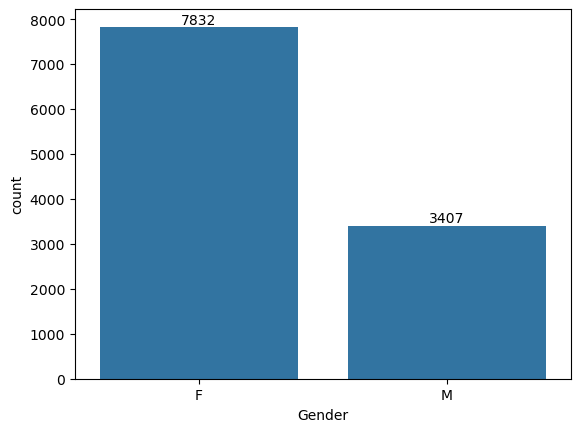

In [24]:
a = sns.countplot(data = df , x = "Gender")
for bars in a.containers:
    a.bar_label(bars)

  Gender    Amount
0      F  74335853
1      M  31913276


<Axes: xlabel='Gender', ylabel='Amount'>

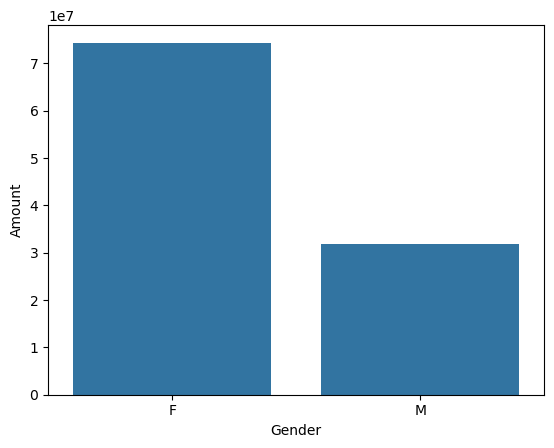

In [26]:
#group gender by the ammount spent
sales = df.groupby(["Gender"], as_index = False)["Amount"].sum().sort_values(by = "Amount",ascending = False)
print(sales)
sns.barplot(data = sales , x = "Gender", y = "Amount")

Frpom the above bar graph we can say that most buyers are women and they have greater purchasing power

AGE


<Axes: xlabel='Age Group', ylabel='count'>

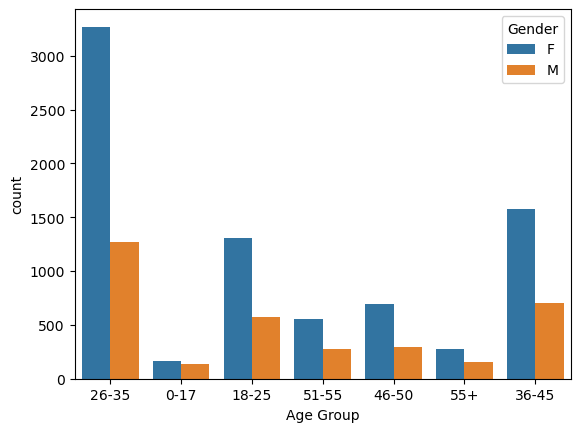

In [28]:
sns.countplot(data = df, x = "Age Group", hue = "Gender")

<Axes: xlabel='Age Group', ylabel='Amount'>

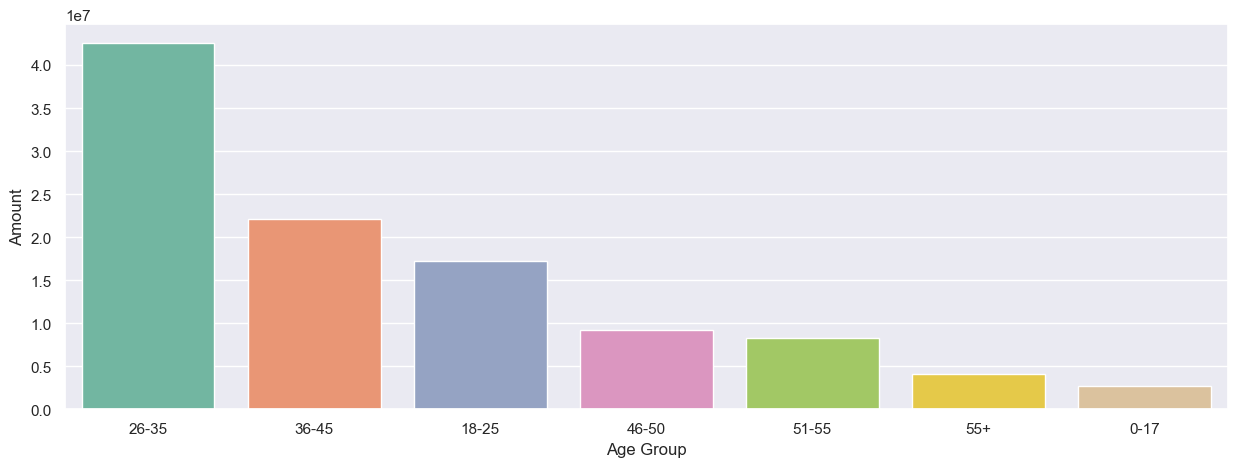

In [60]:
# total amount vs age group
sales_age = df.groupby(['Age Group'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.barplot(
    x='Age Group',
    y='Amount',
    data=sales_age,
    hue='Age Group',     
    palette='Set2',
    legend=False         
)

From above graphs we can see that most of the buyers are of age group between 26-35 yrs female

State

<Axes: xlabel='State', ylabel='Orders'>

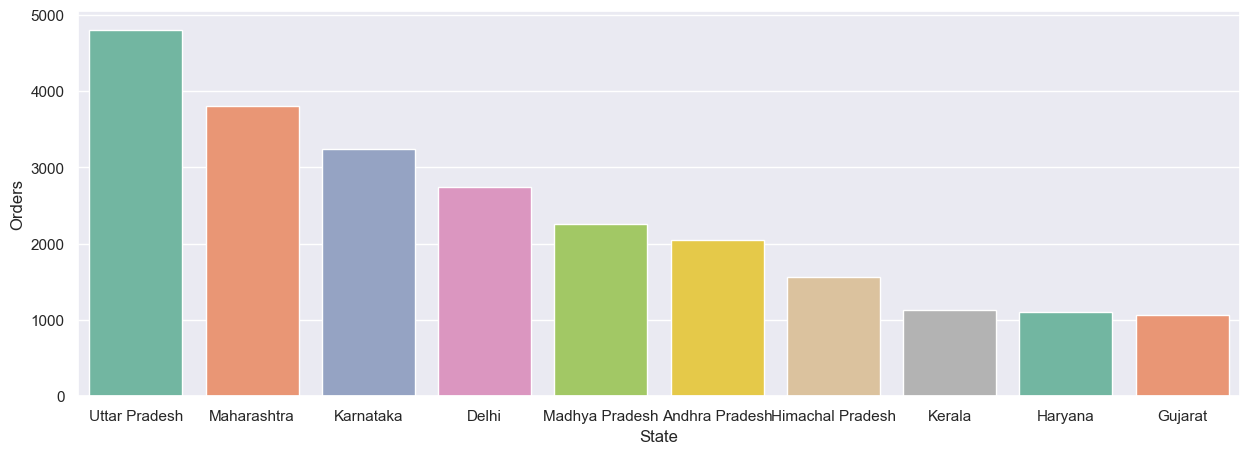

In [54]:
# total number of orders from top 10 states
sales_state = df.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)

sns.set(rc={'figure.figsize': (15, 5)})

sns.barplot(
    data=sales_state,
    x='State',
    y='Orders',
    hue='State',      
    palette='Set2',
    legend=False       
)

<Axes: xlabel='State', ylabel='Amount'>

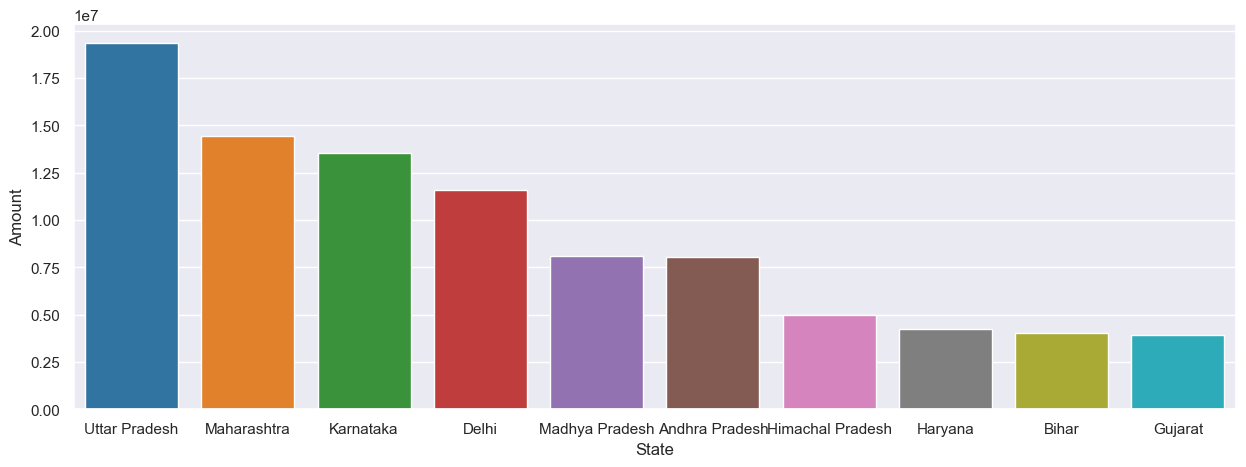

In [62]:
# total amount/sales from top 10 states
sales_state = df.groupby(['State'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)

sns.set(rc={'figure.figsize': (15, 5)})

sns.barplot(
    data=sales_state,
    x='State',
    y='Amount',
    hue='State',       
    palette='tab10',    
    legend=False        
)


From above graphs we can see that most of the orders & total sales/amount are from Uttar Pradesh, Maharashtra and Karnataka respectively

Marital Status

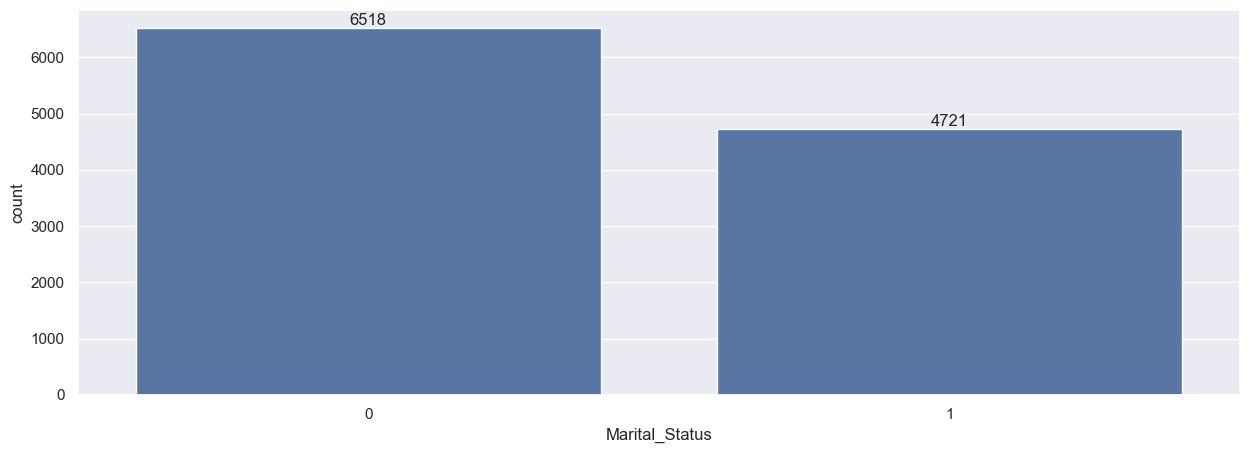

In [38]:
ax = sns.countplot(data = df, x = 'Marital_Status')

sns.set(rc={'figure.figsize':(7,5)})
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Marital_Status', ylabel='Amount'>

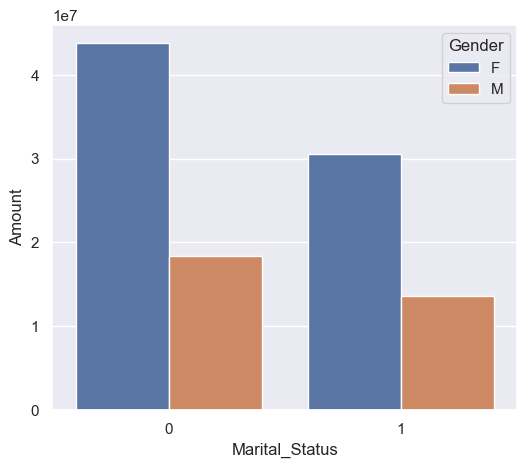

In [42]:

sales_state = df.groupby(['Marital_Status', 'Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.set(rc={'figure.figsize':(6,5)})
sns.barplot(data = sales_state, x = 'Marital_Status',y= 'Amount', hue='Gender')


From above graphs we can see that most of the buyers are married (women) and they have high purchasing power

Occupation

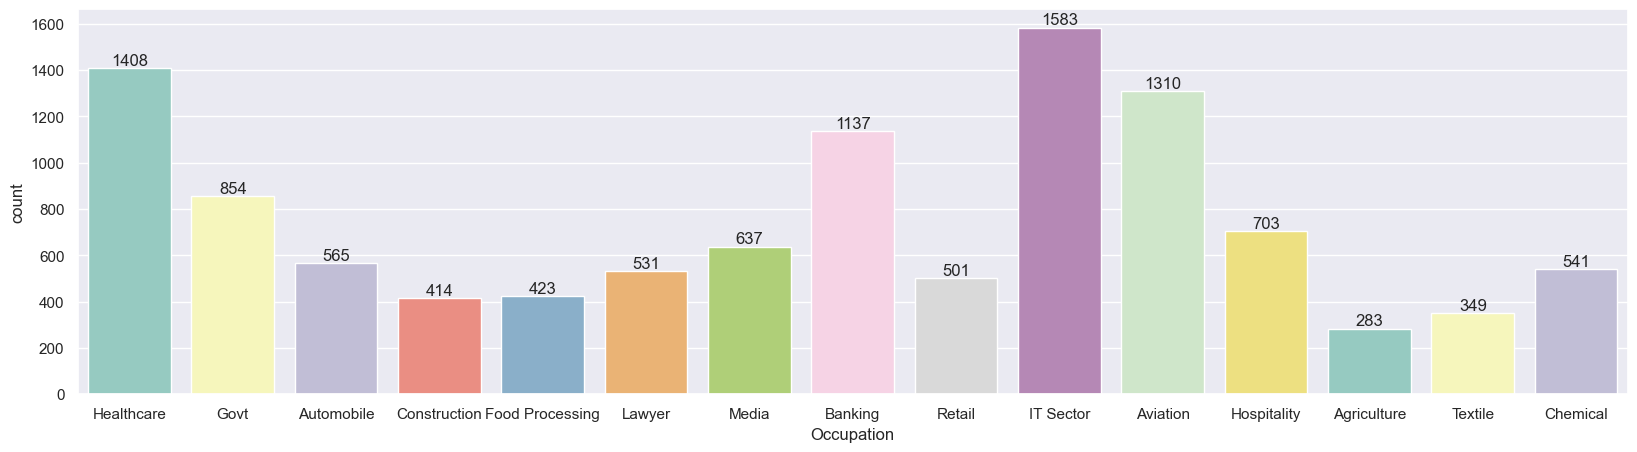

In [64]:
sns.set(rc={'figure.figsize': (20, 5)})

ax = sns.countplot(
    data=df,
    x='Occupation',
    hue='Occupation',     
    palette='Set3',
    legend=False          
)

for bars in ax.containers:
    ax.bar_label(bars)


<Axes: xlabel='Occupation', ylabel='Amount'>

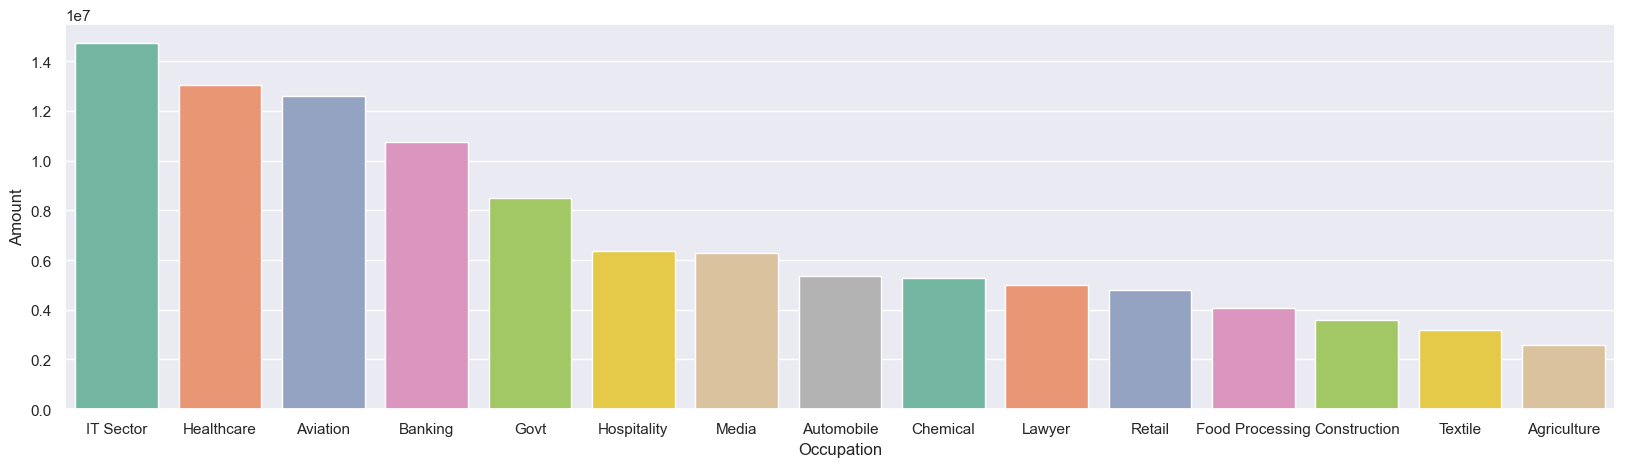

In [66]:
sales_state = df.groupby(['Occupation'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.set(rc={'figure.figsize': (20, 5)})

sns.barplot(
    data=sales_state,
    x='Occupation',
    y='Amount',
    hue='Occupation',    
    palette='Set2',      
    legend=False
)

From above graphs we can see that most of the buyers are working in IT, Healthcare and Aviation sector

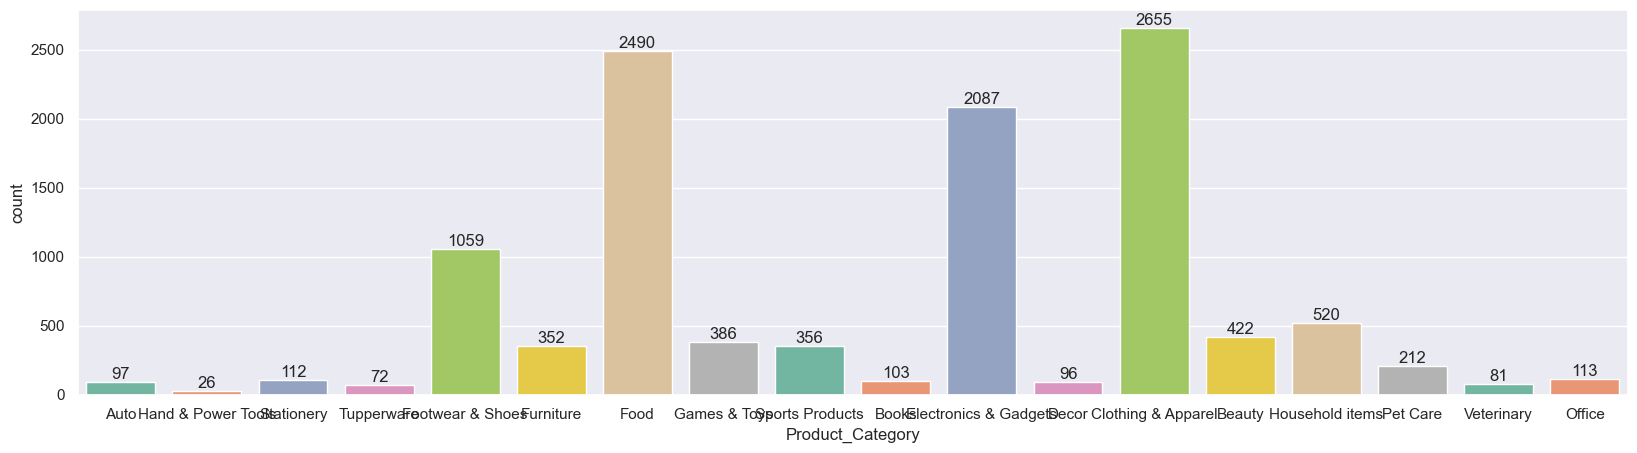

In [68]:
sns.set(rc={'figure.figsize': (20, 5)})

ax = sns.countplot(
    data=df,
    x='Product_Category',
    hue='Product_Category',
    palette='Set2',
    legend=False
)

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Product_Category', ylabel='Amount'>

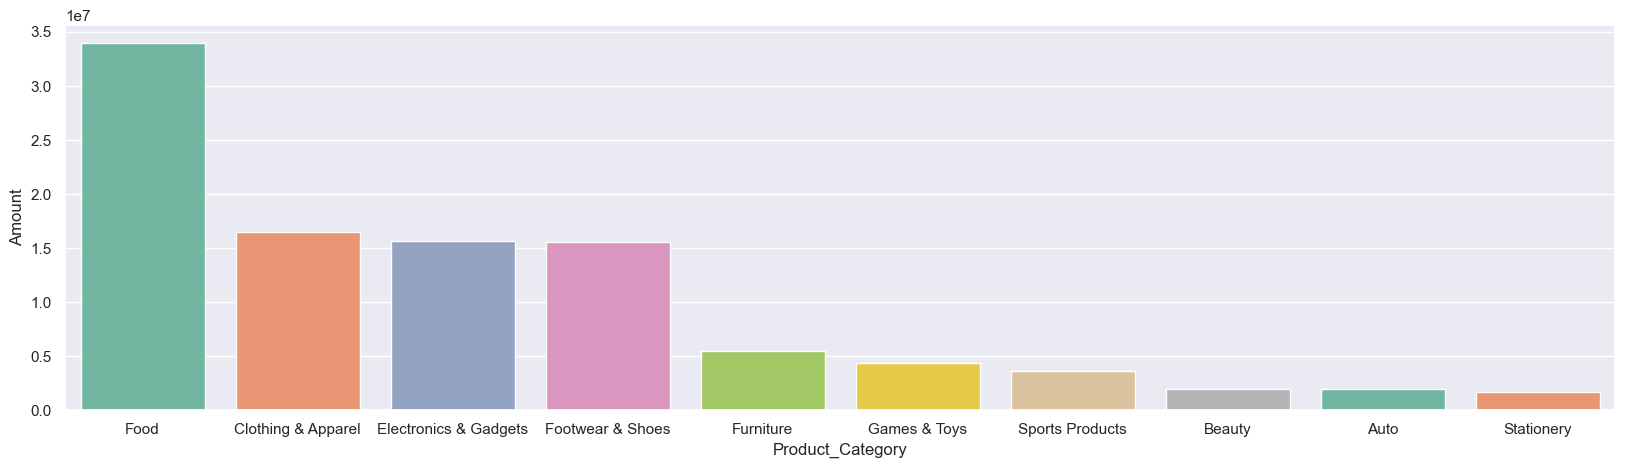

In [70]:
sales_state = df.groupby(['Product_Category'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)

sns.set(rc={'figure.figsize': (20, 5)})

sns.barplot(
    data=sales_state,
    x='Product_Category',
    y='Amount',
    hue='Product_Category',
    palette='Set2',
    legend=False
)

From above graphs we can see that most of the sold products are from Food, Clothing and Electronics category

<Axes: xlabel='Product_ID', ylabel='Orders'>

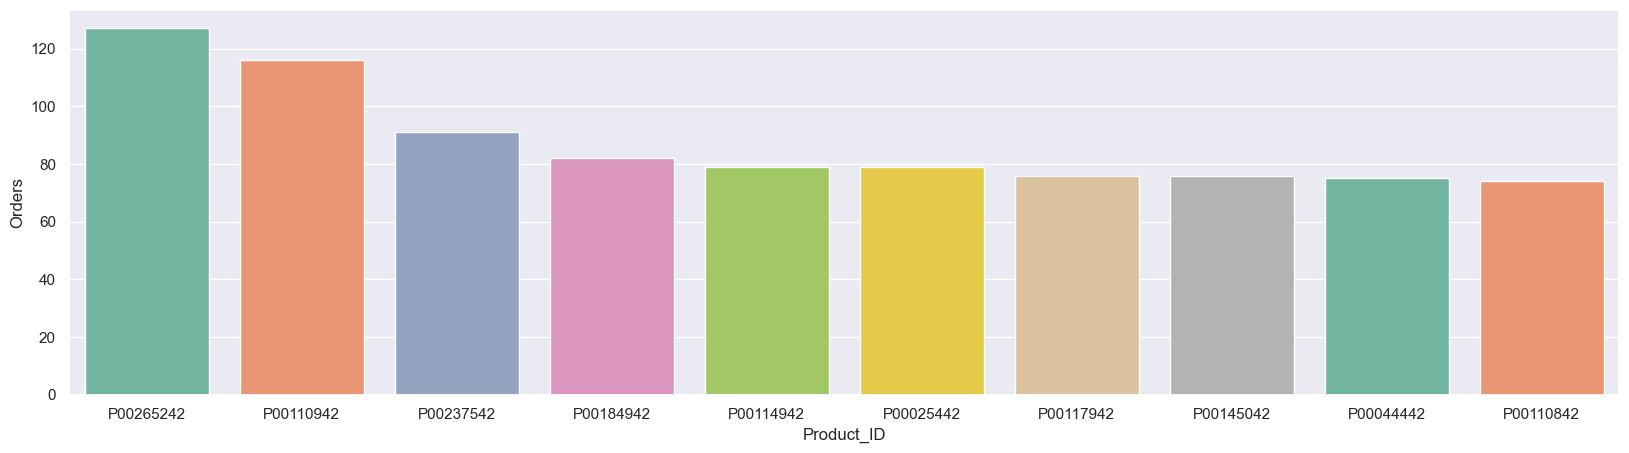

In [72]:
sales_state = df.groupby(['Product_ID'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)

sns.set(rc={'figure.figsize': (20, 5)})

sns.barplot(
    data=sales_state,
    x='Product_ID',
    y='Orders',
    hue='Product_ID',
    palette='Set2',
    legend=False
)

<Axes: xlabel='Product_ID'>

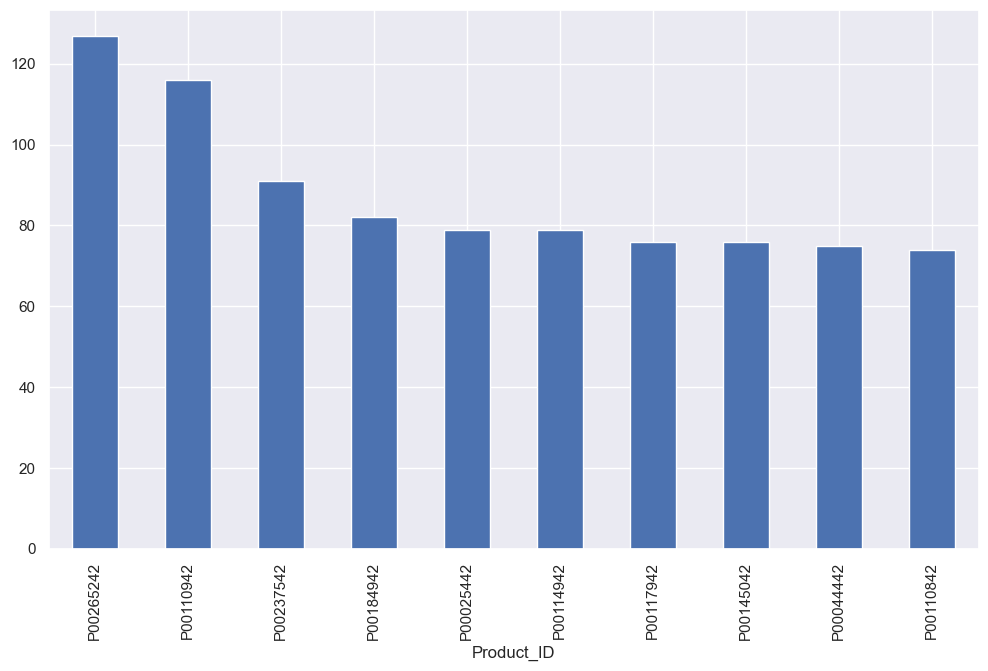

In [56]:
# top 10 most sold products (same thing as above)

fig1, ax1 = plt.subplots(figsize=(12,7))
df.groupby('Product_ID')['Orders'].sum().nlargest(10).sort_values(ascending=False).plot(kind='bar')


Conclusion:

Married women age group 26-35 yrs from UP, Maharastra and Karnataka working in IT, Healthcare and Aviation are more likely to buy products from Food, Clothing and Electronics category